# CSC12110 - Applied Data Analytics

Ho Chi Minh City University of Science - VNUHCM

-   **Class**: 21HTTT - November 2024
-   **Instructors:** Ph.D. Vu Thi My Hang, MSc. Ho Thi Hoang Vy
-   **Group:** 7

|    ID    | Name               | Tasks       | Contrib. (%) |
| :------: | :----------------- | :---------- | :----------: |
| 21127004 | Tran N. An Phong   | Test 111111 |     100      |
| 21127135 | Diep Huu Phuc      | Test 22222  |     100      |
| 21127428 | Pham N. Quoc Thanh | Test 3333   |     100      |

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <span style="display: none;">I. Data inspection</span>
<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
I. Data inspection
</div>

#### 1. First glance of the data

##### a. Data head and info

In [2]:
df_ads = pd.read_csv('2425_QC.csv')
df_ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


In [3]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


**Comment**: 
- The dataset contain 1002 rows and 10 columns.
- There are 8 numerical columns and 4 object column.
- ***City*** and ***Country*** could potentially be treated as category columns while it will be unnatural to treat ***Timestamp*** as one.

In [4]:
df_ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1002.000000,1001.000000,1002.000000,1002.000000,1002.000000,1002.00000
mean,64.988303,36.024975,55001.837565,180.031637,0.481038,0.50000
std,15.870862,8.785692,13401.410392,43.893820,0.499890,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.320000,29.000000,47073.067500,138.905000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.562500,42.000000,65451.787500,218.797500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**There is some notable information such as**:
-   The data was collected from participants aged between 19 and 61, but maybe mainly below 50 (based on mean value).
-   Very likely, the "Daily Internet Usage" column are using minutes as the metric.
-   Gender distribution is equal among participants.
-   The same thing applied for "Clicked on Ad" features.


##### b. Object type features insights

In [5]:
print("Number of unique city: ", df_ads['City'].nunique())
print("Number of unique country: ", df_ads['Country'].nunique())

Number of unique city:  969
Number of unique country:  237


***Comment***: The data was collected from people living in ***969*** cities and ***237*** countries around the world.

In [6]:
print("Number of unique Ad topic line: ", df_ads['Ad Topic Line'].nunique())

Number of unique Ad topic line:  1000


***Comment***: The values in the 'Ad topic line' column are literally unique for each row. Since the column is of object type, we are having difficulty converting these into useful information.

We suspect that the dataset includes data collected only in the year 2016. There will be some measurements to test this.

In [7]:
df_clone = df_ads['Timestamp'].copy()
df_clone['year'] = pd.to_datetime(df_ads['Timestamp'], format='%d/%m/%Y %H:%M').dt.year
print("The number of unique years found in the dataset: ", df_clone['year'].nunique())


The number of unique years found in the dataset:  1


***Comment***: So the suspicion was correct, we are working with data collected in the year 2016 specifically. It is appropriate to remove the year elements from the list of features that may affect the Ad clicking rate as there is only 1 year.

#### 2. Distribution of the non-object features.

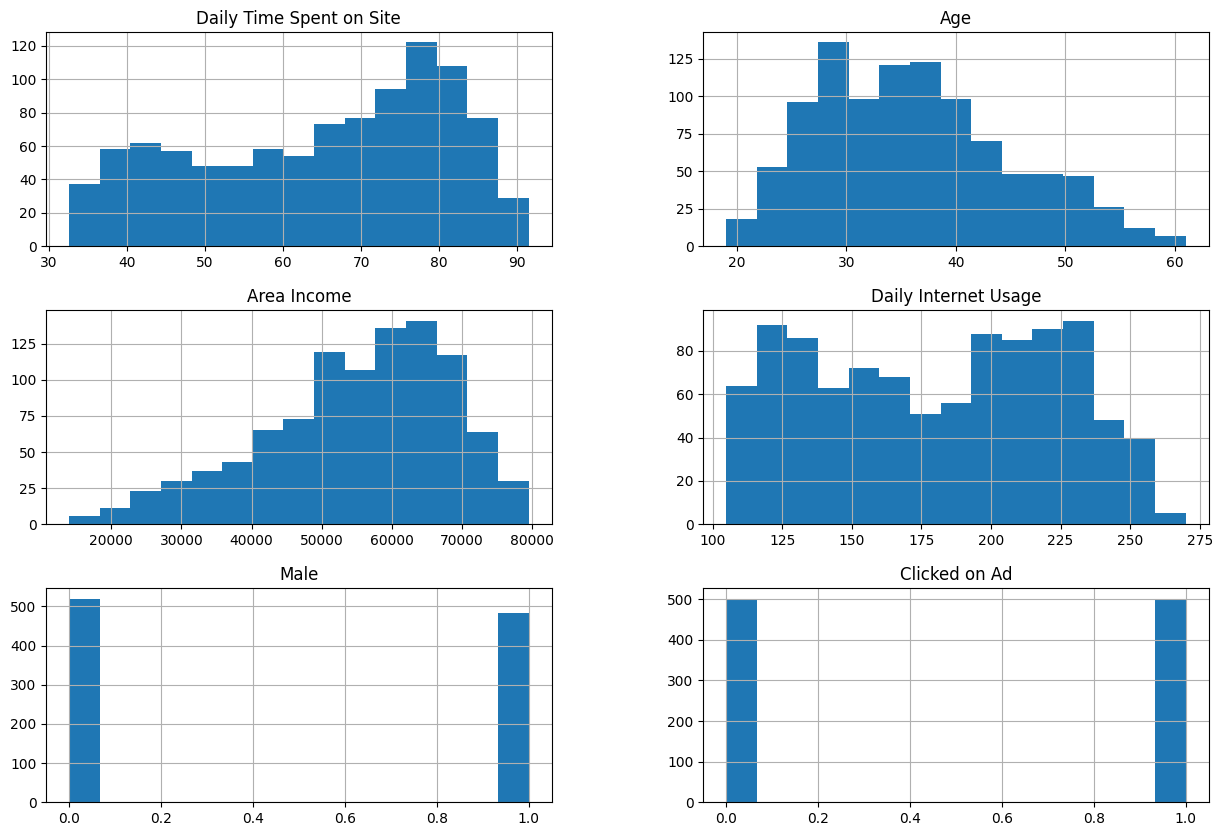

In [8]:
df_ads.hist(bins=15, figsize=(15, 10))
plt.show()

1. **Daily Time Spent on Site:** The distribution skews slightly to the right. Most users spend roughly 70 to 80 minutes daily, with fewer spending less than 40 or more than 90 minutes.

1. **Age**: This distribution appears quite normal, centered around younger adults of 30 year old, with not many people below 20 or above 50.

1. **Area Income:** There is a peak near 60000, indicating a rather well-off user base.

1. **Daily Internet Usage:** With no obvious peak, the distribution seems fairly uniform, ranging between 100 to 250 minutes, implying users spend varying amounts of time online daily. The transition above 250 is rough.

1. **Male:** This variable is binary and shows that there are slightly more female users.

1. **Clicked on Ad:** This is also a binary feature and suggests an even distribution between the people clicking and those who did not. Our dataset is comprised of an equal numbers between two cases.

#### 3. Check for missing values and duplicated rows.

In [9]:
print("-- Missing values in each column:")
print(df_ads.isnull().sum())
print("\n-- Number of duplicate rows: ", df_ads.duplicated().sum())

-- Missing values in each column:
Daily Time Spent on Site    0
Age                         1
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

-- Number of duplicate rows:  2


#### 4. Check for outliers

##### a. Boxplot overview

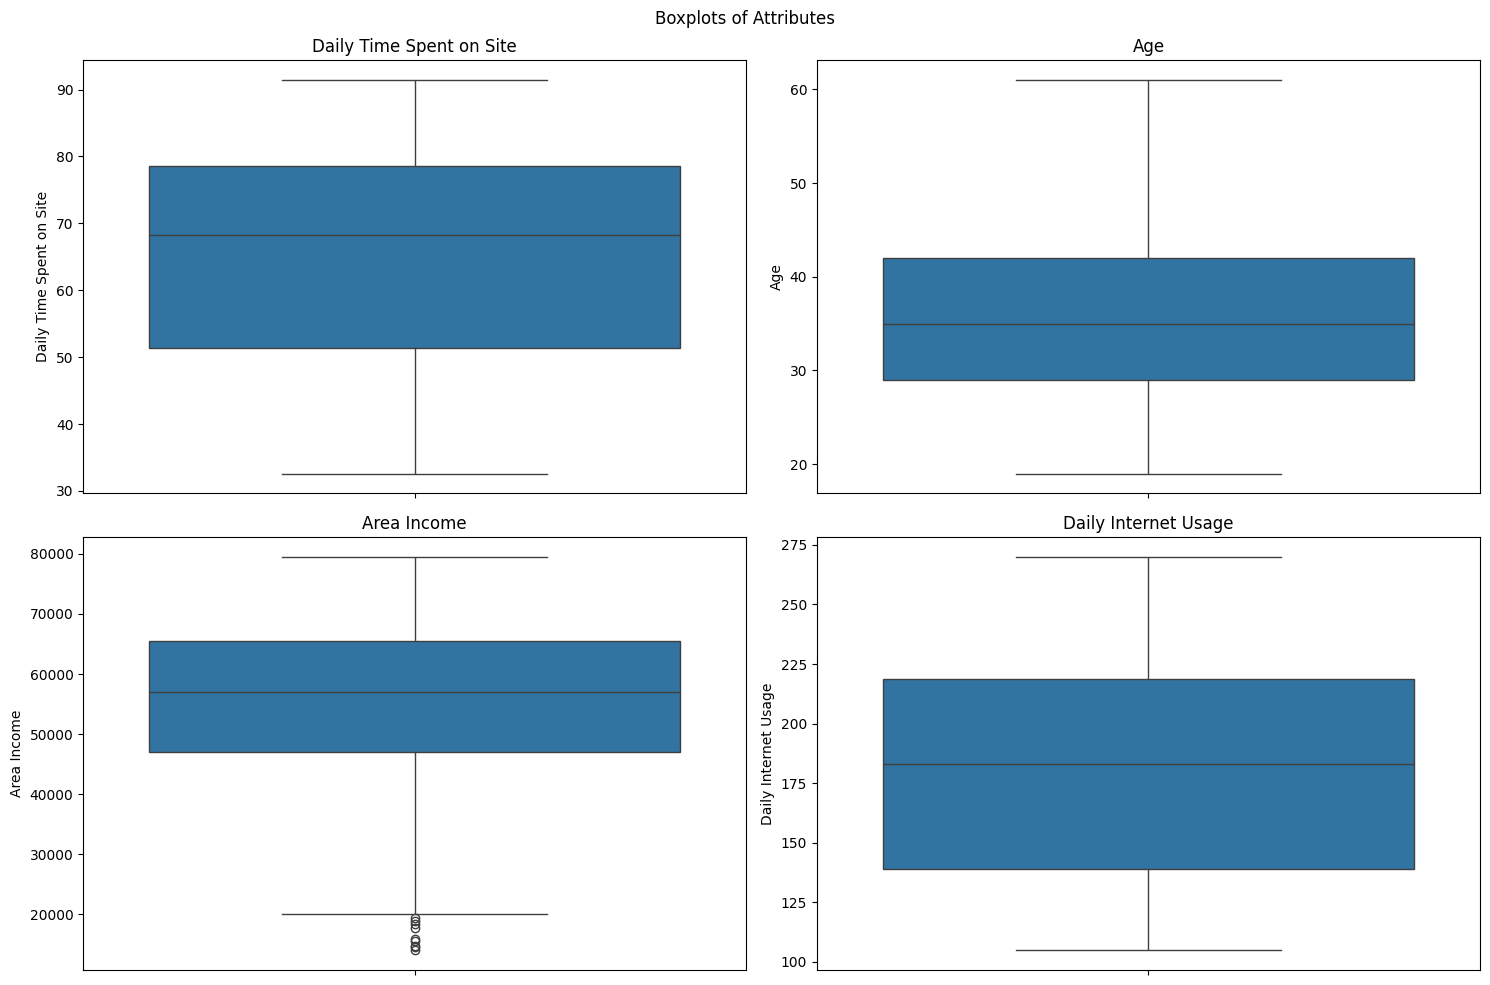

In [10]:
attrs = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Attributes')

for i, attr in enumerate(attrs):
    row, col = divmod(i, 2)
    sns.boxplot(df_ads[attr], ax=axes[row, col])
    axes[row, col].set_title(attr)

plt.tight_layout()
plt.show()

- Although the transition curve is quite smooth in the 'Area Income' graph, the box plot indicated that outliers can still be found in the income range under 20000.
- There is no visible outliers can be spotted from any others feature's plot.

##### b. IQR method

The boxplot method only give hints about which feature may contain outliers. To be more precise, we need to use the IQR method.

In [11]:
def IQR_detect(feature):
    Q1 = df_ads[feature].quantile(0.25)
    Q3 = df_ads[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định giới hạn
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Xóa outlier
    outliers = df_ads[(df_ads[feature] < lower_limit) | (df_ads[feature] > upper_limit)]
    return outliers

In [12]:
# Daily Time Spent on Site
outliers = IQR_detect('Daily Time Spent on Site')
print(outliers)

Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad]
Index: []


In [13]:
# Age
outliers = IQR_detect('Age')
print(outliers)

Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad]
Index: []


In [14]:
# Daily Internet Usage
outliers = IQR_detect('Daily Internet Usage')
print(outliers)

Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad]
Index: []


In [15]:
# Area Income
outliers = IQR_detect('Area Income')
print(outliers.shape)
print(outliers['Area Income'])

(9, 10)
135    17709.98
410    19345.36
510    18819.34
640    15598.29
665    15879.10
692    14548.06
769    13996.50
779    14775.50
953    18368.57
Name: Area Income, dtype: float64


***Conclusion***: Only **Area Income** displays outliers on the lower end, supporting our earlier observation from the histogram.

## <span style="display: none;">II. Handle duplications, missing values and outliers</span>
<div style="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
 II. Handle duplications, missing values and outliers
</div>


- Although **Age**'s distribution appears roughly symmetric and doesn't show any significant outliers, which enables replacing with **mean**, it doesn't make sense for age to not be integer. Thus, we opt for **median**.
- **Area Income**'s outliers are handled with **IQR** and **Capping** methods.
- There are only two **duplicated rows** in the datasets, so it is safe to simply drop them.

#### 1. Drop duplicated

In [16]:
df_ads = df_ads.drop_duplicates()

#### 2. Fill missing age values

In [17]:
df_ads['Age'] = df_ads['Age'].fillna(df_ads['Age'].median())

#### 3. Handle outliers

In [18]:
# Handle Area Income's outliers
q1 = df_ads['Area Income'].quantile(0.25)
q3 = df_ads['Area Income'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_ads['Area Income Capped'] = df_ads['Area Income'].apply(
    lambda x: lower_bound if x < lower_bound
        else upper_bound if x > upper_bound else x
)

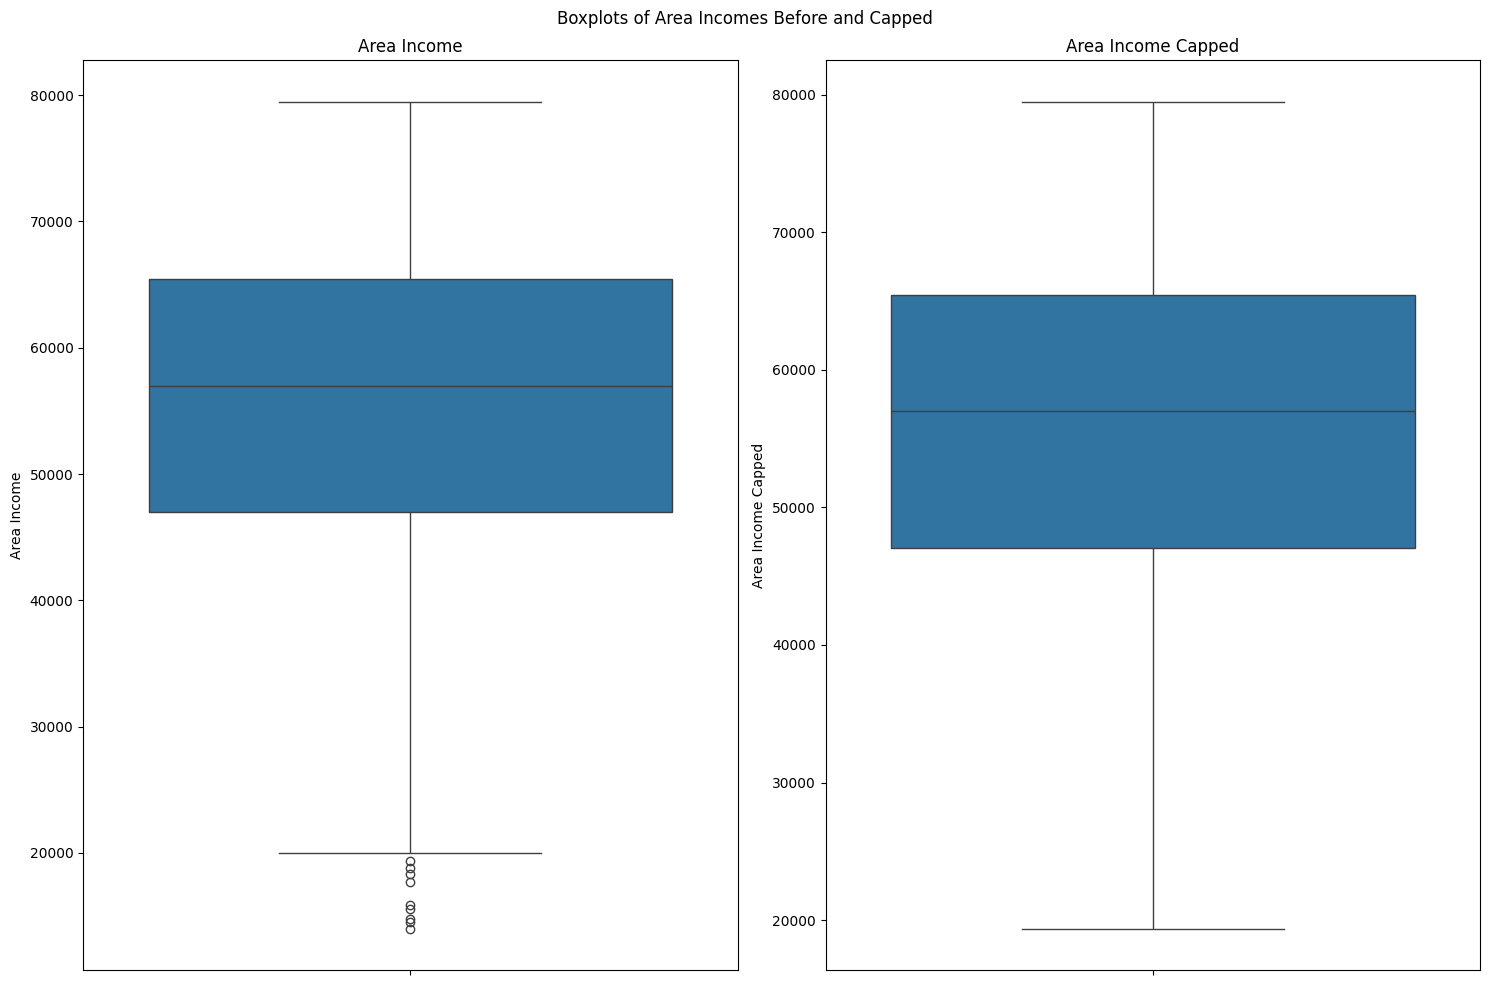

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Boxplots of Area Income''s Before and Capped')

sns.boxplot(df_ads['Area Income'], ax=axes[0])
axes[0].set_title('Area Income')
sns.boxplot(df_ads['Area Income Capped'], ax=axes[1])
axes[1].set_title('Area Income Capped')

plt.tight_layout()
plt.show()

In [20]:
df_ads['Area Income'] = df_ads['Area Income Capped']
df_ads = df_ads.drop(columns=['Area Income Capped'])

## <span style="display: none;">III. Basic data analysis</span>
<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
III. Basic data analysis
</div>

***Note***: 
- Many univariate analysis have been conducted in the previous sections, here in this section we focus on the relation between different features (Bivariate analysis).
- The section title includes the word 'basic' because we will only perform analysis on the information that was provided directly to us, with no manipulation of the original dataset, at least within the limits of this section.

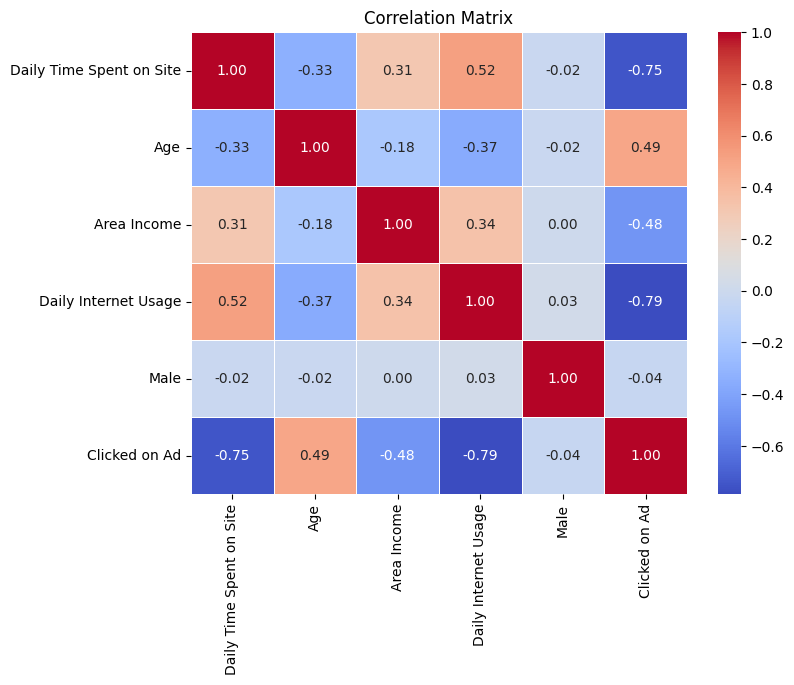

In [21]:
# Exclude boolean columns
numerical_df_exclude_bool = df_ads.select_dtypes(exclude=['object'])
corr_matrix = numerical_df_exclude_bool.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- As can be seen from the matrix, `Age`, `Daily Internet Usage` and `Area Income` have very high correlation with `Clicked on Ad` while `Male`(gender) or not.

#### 1. Univariate analysis

##### a. [Clicked on Ad] and [Age]

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

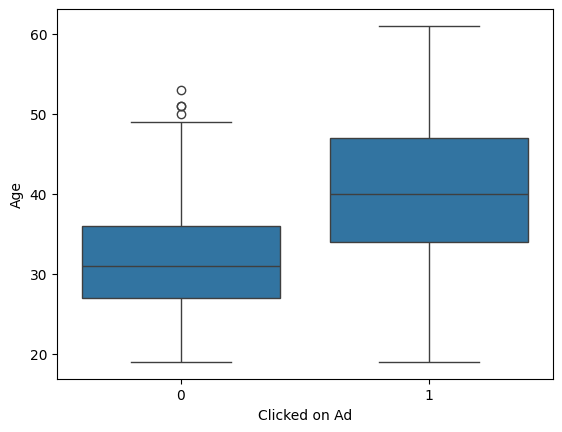

In [22]:
sns.boxplot(data=df_ads, x='Clicked on Ad', y='Age')

***Comment***: The plot suggests that most people over 40 clicked on the ad, while fewer young people under 30 did

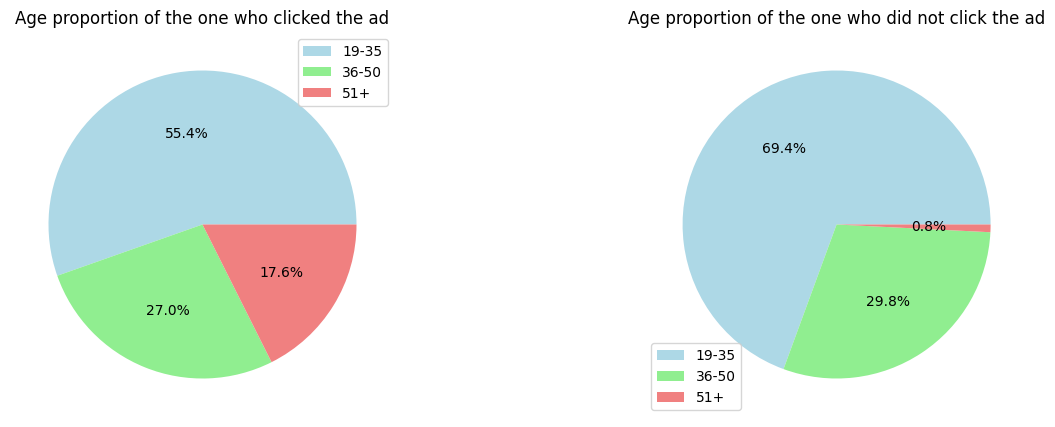

In [23]:
# Define age bins and labels
bins = [19, 35, 50, 100]  # Age groups: 19-35, 36-50, 51+
labels = ['19-35', '36-50', '51+']
df_ads['Age Group'] = pd.cut(df_ads['Age'], bins=bins, labels=labels, right=False)

true_clicked_df = df_ads[df_ads['Clicked on Ad'] == 1]
false_clicked_df = df_ads[df_ads['Clicked on Ad'] == 0]

age_group_counts_true = true_clicked_df['Age Group'].value_counts()
age_group_counts_false = false_clicked_df['Age Group'].value_counts()

fig = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

# Plotting the proportion pie chart
plt.subplot(1,2,1)
plt.pie(age_group_counts_true, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.legend(['19-35', '36-50', '51+'])
plt.title('Age proportion of the one who clicked the ad')

plt.subplot(1,2,2)
plt.pie(age_group_counts_false, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.legend(['19-35', '36-50', '51+'])
plt.title('Age proportion of the one who did not click the ad')

# Show the plot
plt.show()

***Conclusion***: While the middle age group (36-50) does not seem to lean toward either side of the decision, both the remaining group do. Age appears to be one of the decision factors when it comes to whether a person clicks on the ad as old people are more 

##### b. [Clicked on Ad] and [Area Income]

<Axes: xlabel='Clicked on Ad', ylabel='Area Income'>

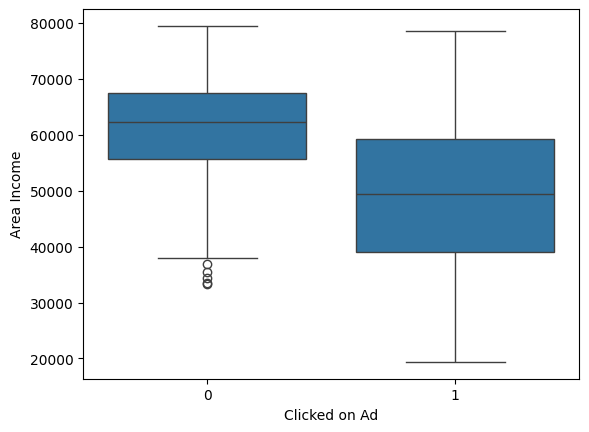

In [24]:
sns.boxplot(data=df_ads, x='Clicked on Ad', y='Area Income')

***Comment***: The plot suggests that people with higher income are less likely to click on Ad.

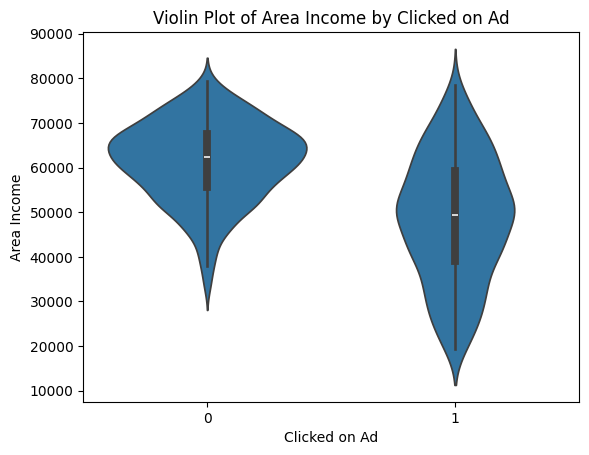

In [25]:
sns.violinplot(x="Clicked on Ad", y="Area Income", data=df_ads)
plt.title("Violin Plot of Area Income by Clicked on Ad")
plt.show()

***Comment***: The distribution of area income for people who did not click on the ad is concentrated mainly between $60,000 and $70,000, indicating a more focused income range. In contrast, the distribution for those who clicked on the ad is more evenly spread across all income levels. This suggests that area income might reflect a person's occupation, and certain job groups may be less inclined to interact with the ad

**Comment**: Area income appears to be a decisive factor in determining the likelihood of clicking on an ad. Individuals with higher incomes, particularly those with an area income between $60,000 and $70,000, are less likely to engage with ads. Conversely, those with lower incomes, especially those earning less than $30,000, show a greater tendency to click on ads

##### c. [Clicked on Ad] and [Male] (gender)

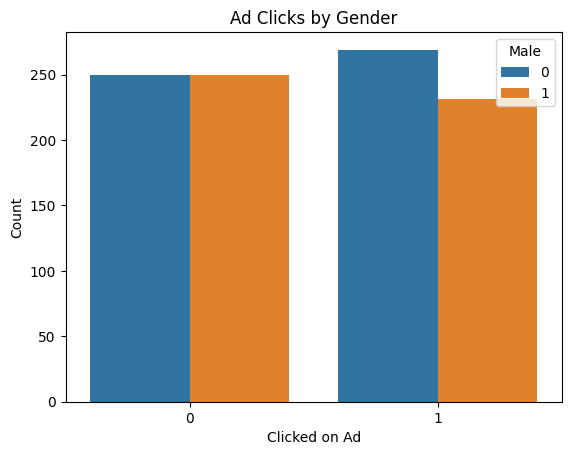

In [26]:
sns.countplot(x="Clicked on Ad", hue="Male", data=df_ads)
plt.title("Ad Clicks by Gender")
plt.xlabel("Clicked on Ad")
plt.ylabel("Count")
plt.show()

**Comment**: The plot reveals that the number of males and females is nearly equal on both sides of the ad-clicking scenario. This suggests that gender does not appear to be a significant factor in determining whether a person clicks on an ad. Combine with the low correlation showed in the matrix, we decide to put this feature aside.

In [27]:
df_ads = df_ads.drop(columns=['Male'])

##### d. [Clicked on Ad] and [Area Income]

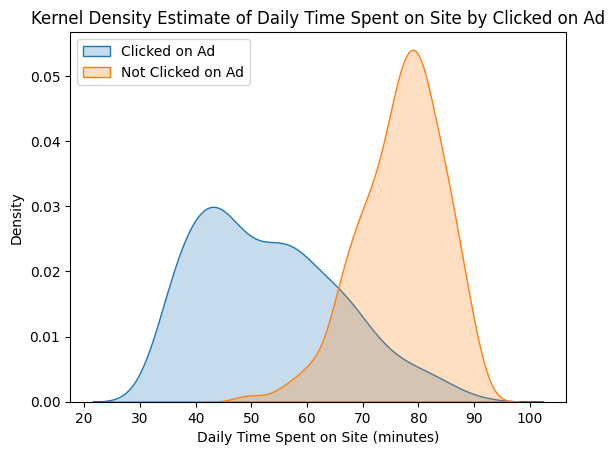

In [28]:
sns.kdeplot(data=df_ads[df_ads['Clicked on Ad'] == 1], x='Daily Time Spent on Site', label='Clicked on Ad', fill=True)
sns.kdeplot(data=df_ads[df_ads['Clicked on Ad'] == 0], x='Daily Time Spent on Site', label='Not Clicked on Ad', fill=True)
plt.title('Kernel Density Estimate of Daily Time Spent on Site by Clicked on Ad')
plt.xlabel('Daily Time Spent on Site (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()

**Comment**: The kernel density estimate indicates a clear shift in daily time spent on the site between two sides. For users who clicked on the ad, the peak density is concentrated on the lower end of time spent (around 40–60 minutes). In opposite, users who did not click on the ad have their peak density lean toward the higher end (approximately 70–90 minutes). This suggests a strong relationship between the amount of time spent on the site and the likelihood of clicking on the ad, where users spending less time are more inclined to click. 

##### e. [Daily Time Spent on Site] and [Age]

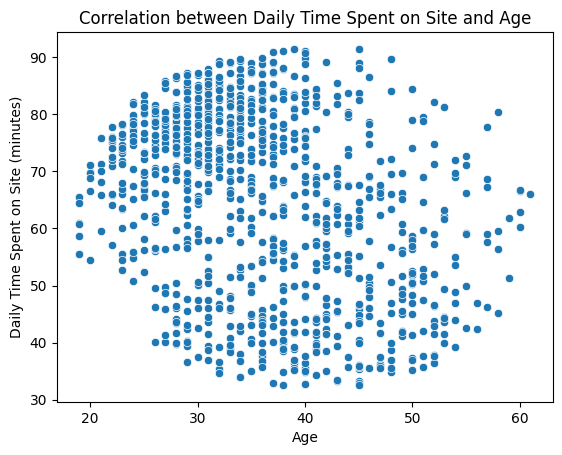

In [29]:
sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=df_ads)
plt.title('Correlation between Daily Time Spent on Site and Age')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site (minutes)')
plt.show()

**Comment*: As expected, the scatter plot shows a nearly circular pattern in the correlation between Daily Time Spent on Site and Age. The top-left quadrant is notably more densely populated, indicating that younger individuals tend to spend more time on the site daily. In contrast, the density decreases significantly for older individuals, particularly those above 50 years, who rarely spend substantial time on the site.

##### f. [Clicked on Ad] and [City]

C:\Users\phong\AppData\Local\Temp\ipykernel_67672\1905453706.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clicked_count, x='City', y='Ad Clicks', palette='viridis')


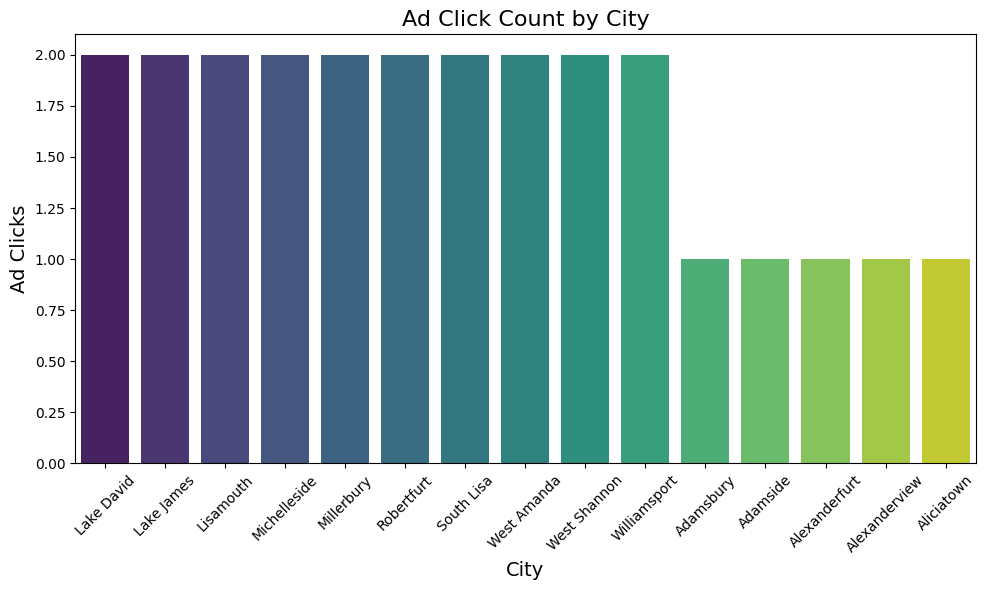

In [30]:
clicked_count = df_ads[df_ads['Clicked on Ad'] == 1].groupby('City')['Clicked on Ad'].sum()

# Reset index for plotting
#Only take 15 city with the most count as there are too many city
clicked_count = clicked_count.nlargest(15).reset_index(name='Ad Clicks')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=clicked_count, x='City', y='Ad Clicks', palette='viridis')

# Add labels and title
plt.title('Ad Click Count by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Ad Clicks', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Comment**: As expected, while some cities show up twice in the dataset, most of them appear only once. This reinforces our previous assumption that city is irrelevant to ad clicks. The same idea is even more evident with the Ad Topic Line, as it is literally unique for each row.

<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
IV. Breakdown the 'Timestamp' feature.
</div>

The Timestamp feature contains multiple elements, such as date, day, month, and time. Breaking it down into these components holds the potential to provide meaningful insights. Also because we will be manipulating the data in a way that differs slightly from its original form, this section will be presented separately from Section III.

In [31]:
df_ads['Timestamp'] = pd.to_datetime(df_ads['Timestamp'], format='%d/%m/%Y %H:%M')

# Create new columns, year column will not be create because we know there are only 1 year in the dataframe.
df_ads['Day of Week'] = df_ads['Timestamp'].dt.day_name()  # Full name of the day
df_ads['Day of Month'] = df_ads['Timestamp'].dt.day
df_ads['Month'] = df_ads['Timestamp'].dt.month

#There are hour and minute in our data, we will simplify the matter by round it down to hour only.
df_ads['Hour'] = df_ads['Timestamp'].dt.hour


# Display the resulting DataFrame
last_4_columns = df_ads.iloc[:, -4:]  # Select all rows and the last 4 columns
print(last_4_columns)

     Day of Week  Day of Month  Month  Hour
0         Sunday            27      3     0
1         Monday             4      4     1
2         Sunday            13      3    20
3         Sunday            10      1     2
4         Friday             3      6     3
...          ...           ...    ...   ...
996     Thursday            11      2    21
997       Friday            22      4     2
998       Monday             1      2    17
999     Thursday            24      3     2
1000      Friday             3      6    21

[1000 rows x 4 columns]


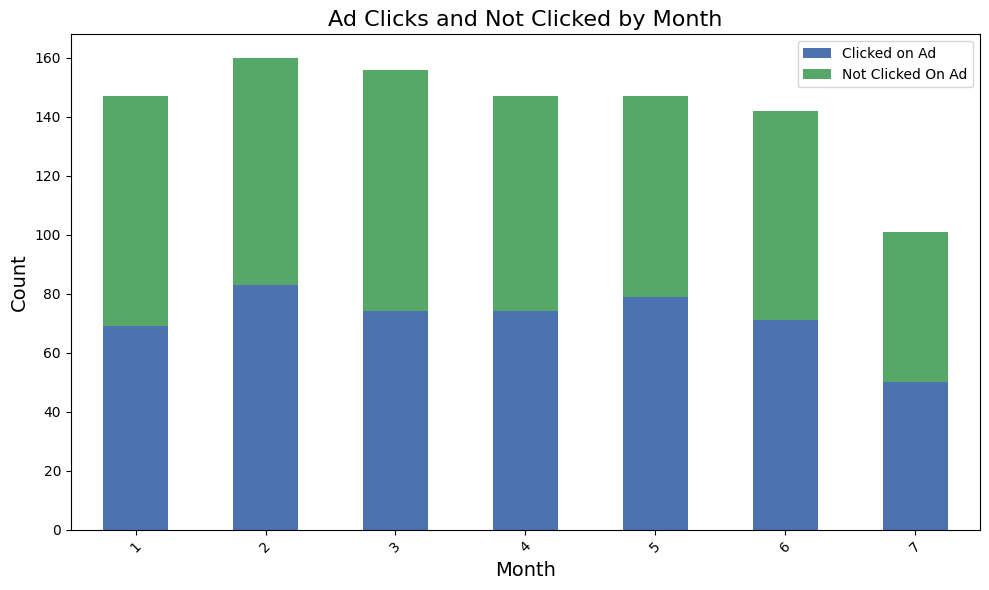

In [32]:
# Group by 'Month' and sum both 'ClickedOnAd' and 'Not Clicked On Ad' counts
df_ads['Not Clicked On Ad'] = 1 - df_ads['Clicked on Ad']
ad_clicks_by_month = df_ads.groupby('Month')[['Clicked on Ad', 'Not Clicked On Ad']].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
ad_clicks_by_month.set_index('Month').plot(kind='bar', stacked=True, color=['#4c72b0', '#55a868'], ax=plt.gca())

# Add labels and title
plt.title('Ad Clicks and Not Clicked by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

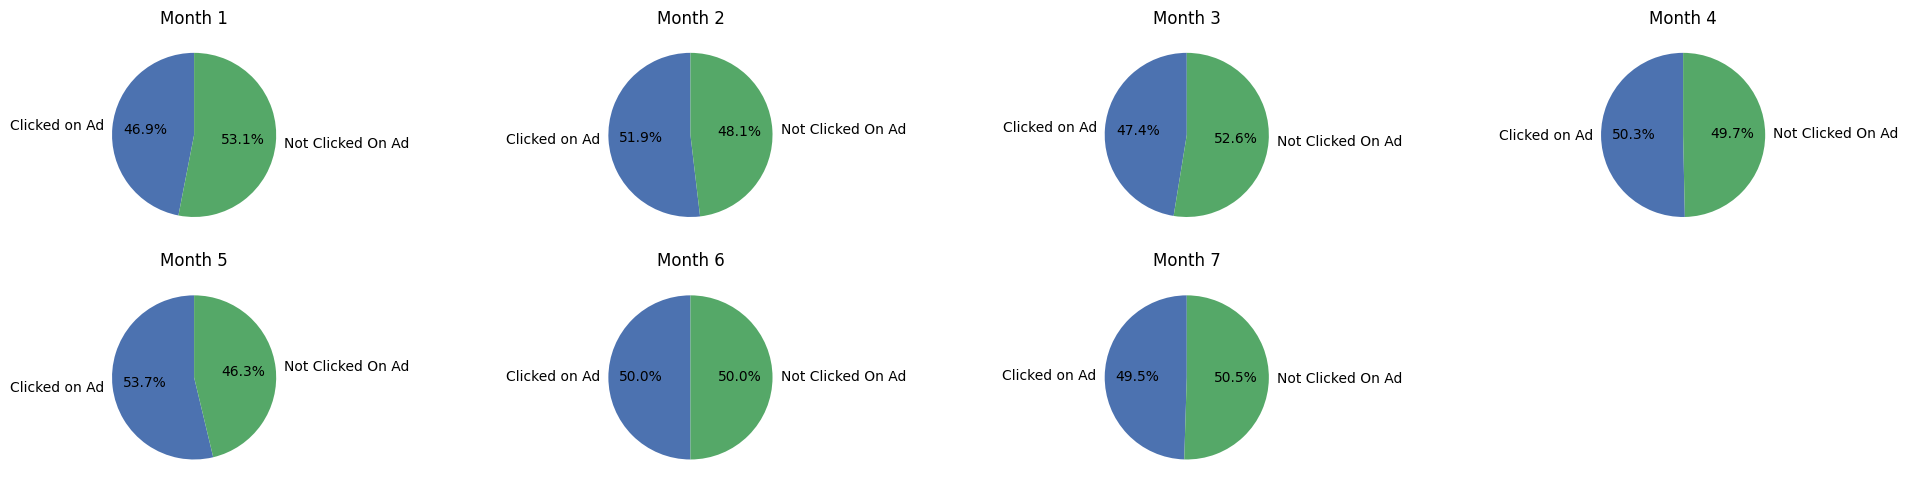

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(20, 5))  # 2 rows, 4 columns (7 months, leave one empty)
axes = axes.flatten()  # Flatten to make it easier to access individual subplots

# Loop through the months and create a pie chart for each one
for i, month in enumerate(ad_clicks_by_month['Month']):
    # Get the data for the specific month
    month_data = ad_clicks_by_month[ad_clicks_by_month['Month'] == month]
    
    # Values for the pie chart
    clicked = month_data['Clicked on Ad'].values[0]
    not_clicked = month_data['Not Clicked On Ad'].values[0]
    
    # Pie chart plotting
    axes[i].pie([clicked, not_clicked], labels=['Clicked on Ad', 'Not Clicked On Ad'], 
                autopct='%1.1f%%', colors=['#4c72b0', '#55a868'], startangle=90)
    axes[i].set_title(f'Month {month}', fontsize=12)

# Remove the last empty subplot (since we only have 7 months)
fig.delaxes(axes[7])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Comment**: Although there is some notable imbalance in the click ratio in certain months (January, March, May), the ratio usually stays around 1:1

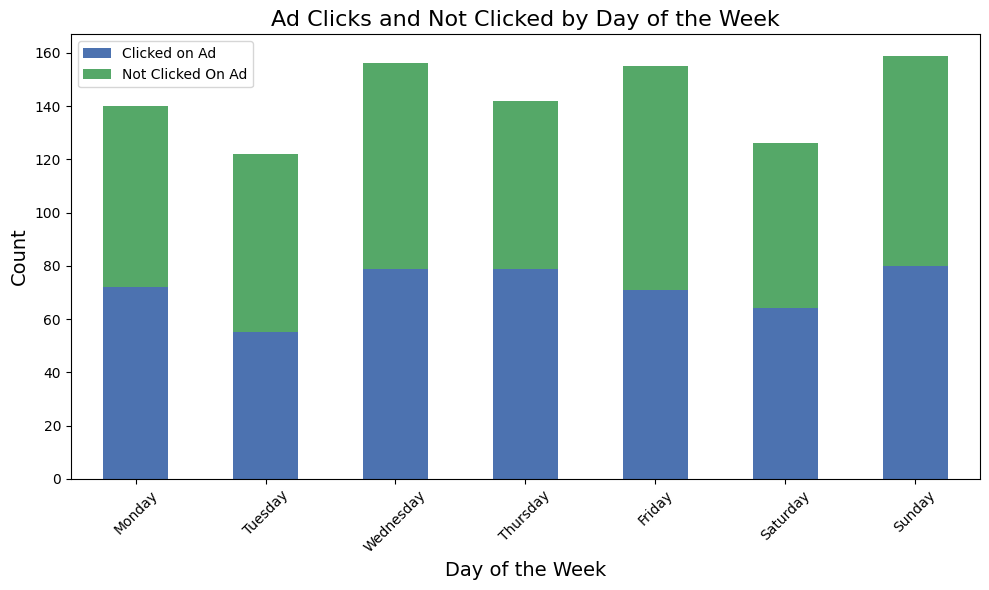

In [34]:
# Group by 'Day of Week' and sum both 'ClickedOnAd' and 'Not Clicked On Ad' counts
ad_clicks_by_day = df_ads.groupby('Day of Week')[['Clicked on Ad', 'Not Clicked On Ad']].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Plotting
plt.figure(figsize=(10, 6))
ad_clicks_by_day.set_index('Day of Week').loc[day_order].plot(kind='bar', stacked=True, color=['#4c72b0', '#55a868'], ax=plt.gca())

# Add labels and title
plt.title('Ad Clicks and Not Clicked by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

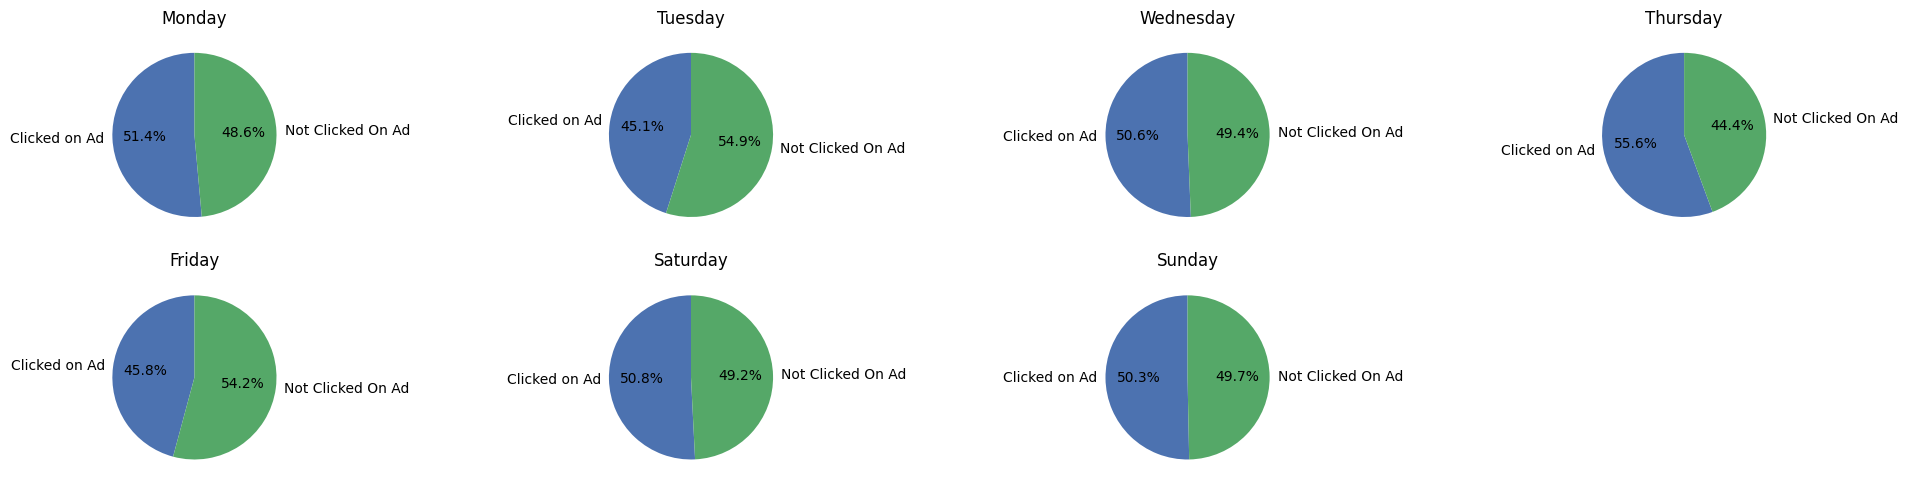

In [35]:
# Create subplots: one pie chart for each day
fig, axes = plt.subplots(2, 4, figsize=(20, 5))  # 2 rows, 4 columns (we'll leave one empty)
axes = axes.flatten()  # Flatten to make it easier to access individual subplots

# Loop through the days and create a pie chart for each one
for i, day in enumerate(day_order):
    # Get the data for the specific day
    day_data = ad_clicks_by_day[ad_clicks_by_day['Day of Week'] == day]
    
    # Values for the pie chart
    clicked = day_data['Clicked on Ad'].values[0]
    not_clicked = day_data['Not Clicked On Ad'].values[0]
    
    # Pie chart plotting
    axes[i].pie([clicked, not_clicked], labels=['Clicked on Ad', 'Not Clicked On Ad'], 
                autopct='%1.1f%%', colors=['#4c72b0', '#55a868'], startangle=90)
    axes[i].set_title(f'{day}', fontsize=12)

# Remove the last empty subplot (in case there are less than 8 days, e.g., if you only have 7)
fig.delaxes(axes[7])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

**Comment**: The same situation can be observed for the days of the week. The click-on-ad ratio slightly varies between days, with Thursday having the highest ratio and Tuesday having the lowest.

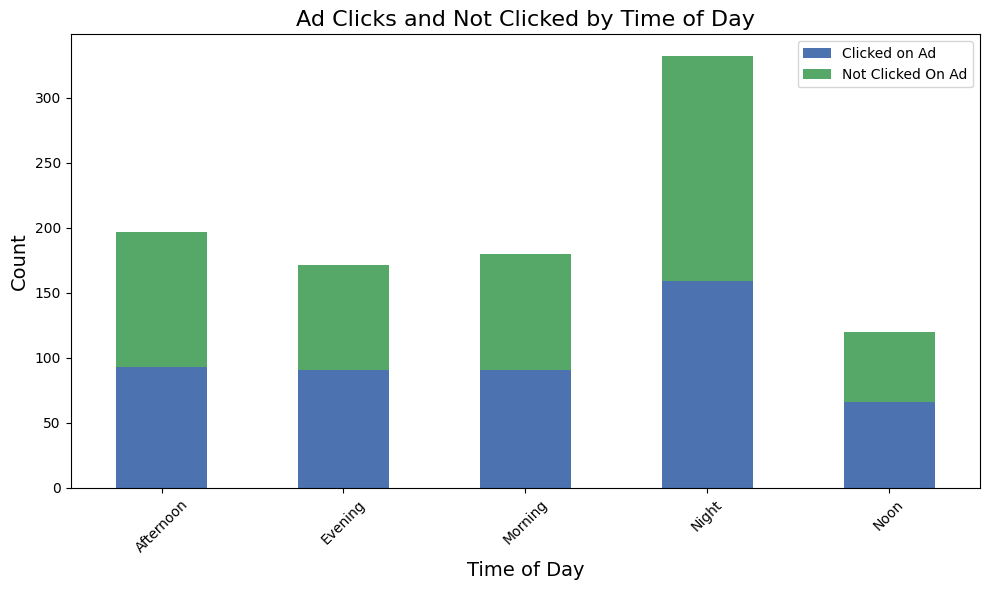

In [36]:
# Define time-of-day categories
def time_of_day(hour):
    if 5 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Noon'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to the 'Hour' column to create a new 'TimeOfDay' column
df_ads['TimeOfDay'] = df_ads['Hour'].apply(time_of_day)

# Group by 'TimeOfDay' and sum 'Clicked on Ad' and 'Not Clicked on Ad'
ad_clicks_by_time_of_day = df_ads.groupby('TimeOfDay')[['Clicked on Ad', 'Not Clicked On Ad']].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
ad_clicks_by_time_of_day.set_index('TimeOfDay').plot(kind='bar', stacked=True, color=['#4c72b0', '#55a868'], ax=plt.gca())

# Add labels and title
plt.title('Ad Clicks and Not Clicked by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

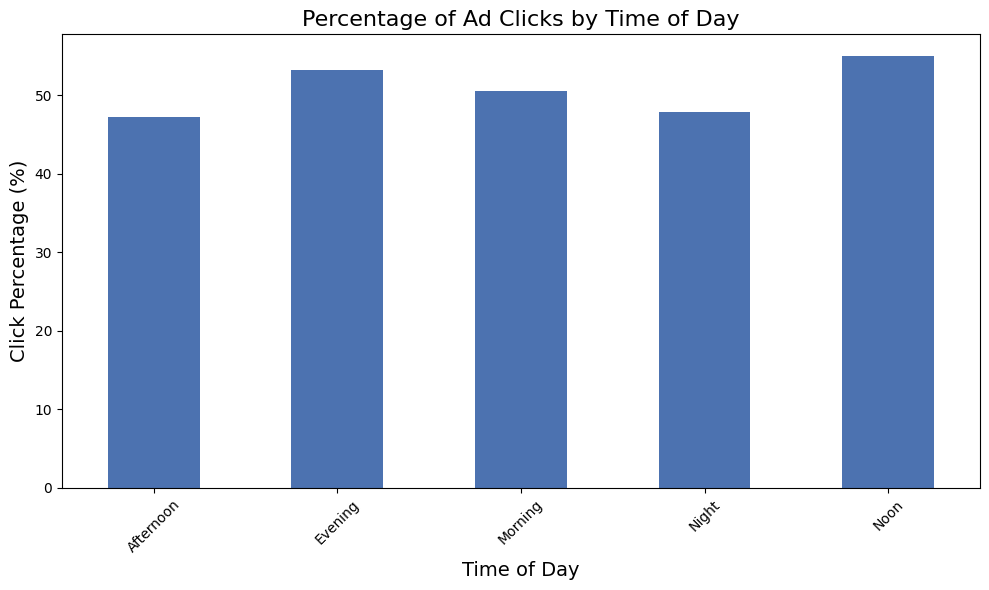

In [37]:
ad_clicks_by_time_of_day = df_ads.groupby('TimeOfDay')[['Clicked on Ad', 'Not Clicked On Ad']].sum().reset_index()

# Calculate the total for each 'TimeOfDay' group to compute click percentage
ad_clicks_by_time_of_day['Total'] = ad_clicks_by_time_of_day['Clicked on Ad'] + ad_clicks_by_time_of_day['Not Clicked On Ad']

# Calculate the click percentage
ad_clicks_by_time_of_day['Clicked on Ad (%)'] = ad_clicks_by_time_of_day['Clicked on Ad'] / ad_clicks_by_time_of_day['Total'] * 100

# Drop the 'Total' column as it's no longer needed
ad_clicks_by_time_of_day = ad_clicks_by_time_of_day.drop(columns=['Total'])

# Plotting
plt.figure(figsize=(10, 6))
ad_clicks_by_time_of_day.set_index('TimeOfDay')['Clicked on Ad (%)'].plot(kind='bar', color='#4c72b0', ax=plt.gca())

# Add labels and title
plt.title('Percentage of Ad Clicks by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Click Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**Comment**: Although the 'Night' time group holds an extremely high number of records, the ad click percentage is not higher than in any other time group. It seems that the time feature does not have a significant impact on the likelihood of clicking an ad.

## <span style="display: none;">IV. Prediction Model</span>
<div style ="text-align: center; background-color: #66c2ff; font-family: verdana; color: white; font-size: 30px; font-weight: bold; padding: 15px">
IV. Prediction Model
</div>

In [38]:
df_ads

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad,Age Group,Day of Week,Day of Month,Month,Hour,Not Clicked On Ad,TimeOfDay
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:00,0,36-50,Sunday,27,3,0,1,Night
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:00,0,19-35,Monday,4,4,1,1,Night
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,San Marino,2016-03-13 20:35:00,0,19-35,Sunday,13,3,20,1,Evening
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Italy,2016-01-10 02:31:00,0,19-35,Sunday,10,1,2,1,Night
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Iceland,2016-06-03 03:36:00,0,36-50,Friday,3,6,3,1,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,72.97,30.0,71384.57,208.58,Fundamental modular algorithm,Duffystad,Lebanon,2016-02-11 21:49:00,1,19-35,Thursday,11,2,21,0,Night
997,51.30,45.0,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,Bosnia and Herzegovina,2016-04-22 02:07:00,1,36-50,Friday,22,4,2,0,Night
998,51.63,51.0,42415.72,120.37,Expanded intangible solution,South Jessica,Mongolia,2016-02-01 17:24:00,1,51+,Monday,1,2,17,0,Evening
999,55.55,19.0,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,Guatemala,2016-03-24 02:35:00,0,19-35,Thursday,24,3,2,1,Night


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

#### 1. Logistic Regression

##### a. With Area Income feature included.


In [40]:
X = df_ads[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df_ads['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)

#K-fold valuation
cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

print(f"- Cross-validated Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"- Cross-validated Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"-Cross-validated F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

- Cross-validated Precision: 0.9769 ± 0.0166
- Cross-validated Recall: 0.9640 ± 0.0297
-Cross-validated F1 Score: 0.9701 ± 0.0171


In [41]:
#Test valuation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))


Test Precision: 0.9633
Test Recall: 0.9459
Test F1 Score: 0.9545

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



##### b. Without Area Income feature.

In [42]:
X = df_ads[['Daily Time Spent on Site', 'Age','Daily Internet Usage']]
y = df_ads['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)

#K-fold valuation
cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

print(f"- Cross-validated Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"- Cross-validated Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"-Cross-validated F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

- Cross-validated Precision: 0.9737 ± 0.0139
- Cross-validated Recall: 0.9408 ± 0.0300
-Cross-validated F1 Score: 0.9567 ± 0.0159


In [43]:
#Test valuation
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred))

Test Precision: 0.9450
Test Recall: 0.9279
Test F1 Score: 0.9364

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



**Comment**: As all the scores drop when we exclude the Area Income feature, this feature is correlated with the likelihood of clicking on an ad.

#### 2. Forest Classifer

##### a. With Area Income included.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
X = df_ads[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df_ads['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# K-fold cross-validation (5 folds) for precision, recall, and F1 score
cv_precision = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

# Print the results
print(f"- Cross-validated Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"- Cross-validated Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"- Cross-validated F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

- Cross-validated Precision: 0.9689 ± 0.0212
- Cross-validated Recall: 0.9511 ± 0.0297
- Cross-validated F1 Score: 0.9597 ± 0.0206


In [46]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# # Get feature importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importance from Random Forest:")
print(feature_importance)


Precision: 0.9537
Recall: 0.9279
F1-Score: 0.9406
Feature importance from Random Forest:
Daily Internet Usage        0.482215
Daily Time Spent on Site    0.356543
Area Income                 0.100694
Age                         0.060548
dtype: float64


##### b. Without Area Income.

In [47]:
X = df_ads[['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']]
y = df_ads['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# K-fold cross-validation (5 folds) for precision, recall, and F1 score
cv_precision = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')

# Print the results
print(f"- Cross-validated Precision: {cv_precision.mean():.4f} ± {cv_precision.std():.4f}")
print(f"- Cross-validated Recall: {cv_recall.mean():.4f} ± {cv_recall.std():.4f}")
print(f"- Cross-validated F1 Score: {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

- Cross-validated Precision: 0.9671 ± 0.0228
- Cross-validated Recall: 0.9485 ± 0.0232
- Cross-validated F1 Score: 0.9572 ± 0.0051


In [48]:
# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Precision: 0.9450
Recall: 0.9279
F1-Score: 0.9364


**Comment**: The importance of `Area Income` is the same as tested in the Logistic Regression algorithm.